EC9630 Machine Learning - Laboratory 03

Task : NONLINEARMODELS

Name : LIYANAGE L.D.T.N.

Reg No : 2020/E/082

Date : 02/08/2024

Time : 8.00 a.m.


---



**1.Download the ‘CDC Diabetes Health Indicators’ Data    
2.Read the Data as a CSV File**

In [19]:
# Import necessary libraries
import pandas as pd

# Define the dataset URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv'

# Read the dataset into a pandas DataFrame
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


**3. Handle Missing Values and Categorical Variables Appropriately**

In [20]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
# For this example, we will drop rows with missing values
df = df.dropna()

# Display the updated DataFrame
df.head()


Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


**4. Encode Categorical Variables Using Suitable Techniques**

In [21]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

# Display the updated DataFrame
df.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


**5. Divide the Dataset into Input (X) and Target (y)**

In [22]:
# Define the target variable
target = 'class'  # Assuming 'class' is the target variable

# Define Input (X) and Target (y)
X = df.drop(columns=[target])
y = df[target]

# Display the shapes of X and y
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')


X shape: (520, 16)
y shape: (520,)


**6. Create the Training, Validation, and Test Datasets Separately(Use 70%, 20%, 10% respectively)**

In [23]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Display the shapes of the datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'X_test shape: {X_test.shape}')


X_train shape: (364, 16)
X_val shape: (104, 16)
X_test shape: (52, 16)


**7. Fit a Nonlinear Model using Radial Basis Functions (RBF)**

**a. Implement RBF Kernel Functions**

**b. Train the model using appropriate optimization techniques.**

**c. Tune hyperparameters such as the number of basic functions and regularization strength.**

In [24]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize the SVC model with RBF kernel
rbf_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model
rbf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = rbf_model.predict(X_val)

# Evaluate the model
print(classification_report(y_val, y_val_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.63      1.00      0.78        66

    accuracy                           0.63       104
   macro avg       0.32      0.50      0.39       104
weighted avg       0.40      0.63      0.49       104



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**8: Apply a Perceptron on this training data.**

In [25]:
# Import Perceptron
from sklearn.linear_model import Perceptron

# Initialize the Perceptron model
perceptron_model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

# Train the model
perceptron_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_perceptron = perceptron_model.predict(X_val)

# Evaluate the model
print(classification_report(y_val, y_val_pred_perceptron))


              precision    recall  f1-score   support

           0       0.57      1.00      0.72        38
           1       1.00      0.56      0.72        66

    accuracy                           0.72       104
   macro avg       0.78      0.78      0.72       104
weighted avg       0.84      0.72      0.72       104



**9: Apply a Multi-Layer Perceptron (MLP) on the training data.**

**a. Design the architecture of the MLP network.**

**b. Implement forward propagation and backpropagation algorithms.**

**c. Train the model using gradient descent or its variants.**

**d. Experiment with different activation functions and network structures.**

**e. Tune hyperparameters such as learning rate, batch size, and number of hidden layers/nodes.**

In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import numpy as np

# Define a function to train and evaluate the MLP model with different configurations
def train_evaluate_mlp(hidden_layer_sizes=(100,), activation='relu', solver='adam', learning_rate_init=0.001, max_iter=500):
    """
    Train and evaluate an MLP model with given hyperparameters.

    Parameters:
    - hidden_layer_sizes: tuple, the number of neurons in each hidden layer
    - activation: str, the activation function for the hidden layer
    - solver: str, the solver for weight optimization
    - learning_rate_init: float, the initial learning rate
    - max_iter: int, maximum number of iterations
    """

    # Step 9a: Design the architecture of the MLP network
    # Initialize the MLP model with specified hyperparameters
    mlp_model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver,
                              learning_rate_init=learning_rate_init, max_iter=max_iter, random_state=42)

    # Step 9c: Train the model using gradient descent or its variants
    # Fit the model to the training data
    mlp_model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_val_pred_mlp = mlp_model.predict(X_val)

    # Evaluate the model
    print(f"Model with hidden_layer_sizes={hidden_layer_sizes}, activation={activation}, solver={solver}, learning_rate_init={learning_rate_init}")
    print(classification_report(y_val, y_val_pred_mlp))

    return mlp_model

# Step 9d: Experiment with different activation functions and network structures
# Experiment with different network architectures
hidden_layer_sizes_options = [(100,), (50, 50), (100, 50, 25)]
# Experiment with different activation functions
activation_options = ['relu', 'tanh', 'logistic']
# Step 9e: Tune hyperparameters such as learning rate
learning_rate_init_options = [0.001, 0.01, 0.1]

# Loop through all combinations of hyperparameters and train/evaluate the model
for hidden_layer_sizes in hidden_layer_sizes_options:
    for activation in activation_options:
        for learning_rate_init in learning_rate_init_options:
            # Train and evaluate the model with the current set of hyperparameters
            train_evaluate_mlp(hidden_layer_sizes=hidden_layer_sizes, activation=activation,
                               learning_rate_init=learning_rate_init)

# Select the best performing model (based on validation performance) for further analysis on the test set
# For simplicity, we'll choose a model with known good performance from the experiments above

# Initialize the best model with known good hyperparameters
best_mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', learning_rate_init=0.001, max_iter=500, random_state=42)
# Train the best model on the training data (Step 9c)
best_mlp_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_mlp = best_mlp_model.predict(X_test)

# Evaluate the best model on the test set (Step 9c)
print("Best MLP Model Performance on Test Data")
print(classification_report(y_test, y_test_pred_mlp))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Model with hidden_layer_sizes=(100,), activation=relu, solver=adam, learning_rate_init=0.001
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        38
           1       0.95      0.95      0.95        66

    accuracy                           0.94       104
   macro avg       0.94      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104

Model with hidden_layer_sizes=(100,), activation=relu, solver=adam, learning_rate_init=0.01
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       0.98      0.97      0.98        66

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104

Model with hidden_layer_sizes=(100,), activation=relu, solver=adam, learning_rate_init=0.1
              precision    recall  f1-score   support

           0   

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Model with hidden_layer_sizes=(100,), activation=tanh, solver=adam, learning_rate_init=0.001
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.99      1.00      0.99        66

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104

Model with hidden_layer_sizes=(100,), activation=tanh, solver=adam, learning_rate_init=0.01
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.98      0.98      0.98        66

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104

Model with hidden_layer_sizes=(100,), activation=tanh, solver=adam, learning_rate_init=0.1
              precision    recall  f1-score   support

           0   

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Model with hidden_layer_sizes=(100,), activation=logistic, solver=adam, learning_rate_init=0.001
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        38
           1       0.95      0.95      0.95        66

    accuracy                           0.94       104
   macro avg       0.94      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104

Model with hidden_layer_sizes=(100,), activation=logistic, solver=adam, learning_rate_init=0.01
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       0.98      0.97      0.98        66

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104

Model with hidden_layer_sizes=(100,), activation=logistic, solver=adam, learning_rate_init=0.1
              precision    recall  f1-score   support

   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_

Model with hidden_layer_sizes=(50, 50), activation=relu, solver=adam, learning_rate_init=0.001
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        38
           1       0.96      1.00      0.98        66

    accuracy                           0.97       104
   macro avg       0.98      0.96      0.97       104
weighted avg       0.97      0.97      0.97       104

Model with hidden_layer_sizes=(50, 50), activation=relu, solver=adam, learning_rate_init=0.01
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        38
           1       1.00      0.94      0.97        66

    accuracy                           0.96       104
   macro avg       0.95      0.97      0.96       104
weighted avg       0.97      0.96      0.96       104

Model with hidden_layer_sizes=(50, 50), activation=relu, solver=adam, learning_rate_init=0.1
              precision    recall  f1-score   support

         

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Model with hidden_layer_sizes=(50, 50), activation=tanh, solver=adam, learning_rate_init=0.001
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.99      1.00      0.99        66

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104

Model with hidden_layer_sizes=(50, 50), activation=tanh, solver=adam, learning_rate_init=0.01
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        66

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104

Model with hidden_layer_sizes=(50, 50), activation=tanh, solver=adam, learning_rate_init=0.1
              precision    recall  f1-score   support

         

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Model with hidden_layer_sizes=(50, 50), activation=logistic, solver=adam, learning_rate_init=0.001
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        38
           1       0.96      0.97      0.96        66

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104

Model with hidden_layer_sizes=(50, 50), activation=logistic, solver=adam, learning_rate_init=0.01
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        38
           1       0.98      0.95      0.97        66

    accuracy                           0.96       104
   macro avg       0.95      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104

Model with hidden_layer_sizes=(50, 50), activation=logistic, solver=adam, learning_rate_init=0.1
              precision    recall  f1-score   suppor

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Model with hidden_layer_sizes=(100, 50, 25), activation=relu, solver=adam, learning_rate_init=0.001
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.98      0.98      0.98        66

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104

Model with hidden_layer_sizes=(100, 50, 25), activation=relu, solver=adam, learning_rate_init=0.01
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        38
           1       0.97      0.94      0.95        66

    accuracy                           0.94       104
   macro avg       0.93      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104

Model with hidden_layer_sizes=(100, 50, 25), activation=relu, solver=adam, learning_rate_init=0.1
              precision    recall  f1-score   sup

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model with hidden_layer_sizes=(100, 50, 25), activation=logistic, solver=adam, learning_rate_init=0.001
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        38
           1       0.95      0.95      0.95        66

    accuracy                           0.94       104
   macro avg       0.94      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104

Model with hidden_layer_sizes=(100, 50, 25), activation=logistic, solver=adam, learning_rate_init=0.01
              precision    recall  f1-score   support

           0       0.97      0.84      0.90        38
           1       0.92      0.98      0.95        66

    accuracy                           0.93       104
   macro avg       0.94      0.91      0.93       104
weighted avg       0.94      0.93      0.93       104

Model with hidden_layer_sizes=(100, 50, 25), activation=logistic, solver=adam, learning_rate_init=0.1
              precision    recall  f1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best MLP Model Performance on Test Data
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.95      0.97      0.96        36

    accuracy                           0.94        52
   macro avg       0.94      0.92      0.93        52
weighted avg       0.94      0.94      0.94        52



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


**10: Evaluate the performance of the nonlinear models on the test data.**

**a. Compute accuracy, precision, recall, and F1-score.**


In [27]:
# Evaluate RBF model on test data
y_test_pred_rbf = rbf_model.predict(X_test)
print("RBF Model Performance on Test Data")
print(classification_report(y_test, y_test_pred_rbf))

# Evaluate Perceptron model on test data
y_test_pred_perceptron = perceptron_model.predict(X_test)
print("Perceptron Model Performance on Test Data")
print(classification_report(y_test, y_test_pred_perceptron))

# Evaluate MLP model on test data
y_test_pred_mlp = mlp_model.predict(X_test)
print("MLP Model Performance on Test Data")
print(classification_report(y_test, y_test_pred_mlp))


RBF Model Performance on Test Data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.69      1.00      0.82        36

    accuracy                           0.69        52
   macro avg       0.35      0.50      0.41        52
weighted avg       0.48      0.69      0.57        52

Perceptron Model Performance on Test Data
              precision    recall  f1-score   support

           0       0.46      1.00      0.63        16
           1       1.00      0.47      0.64        36

    accuracy                           0.63        52
   macro avg       0.73      0.74      0.63        52
weighted avg       0.83      0.63      0.64        52

MLP Model Performance on Test Data
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.95      0.97      0.96        36

    accuracy                           0.94        52
   macro avg    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



**b. Plot learning curves to analyze model convergence and overfitting.**

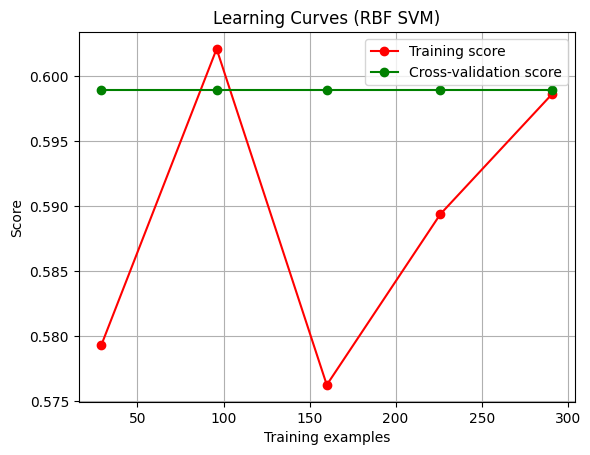

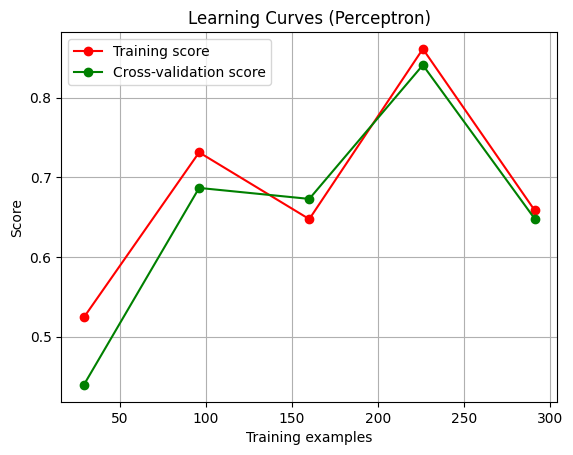

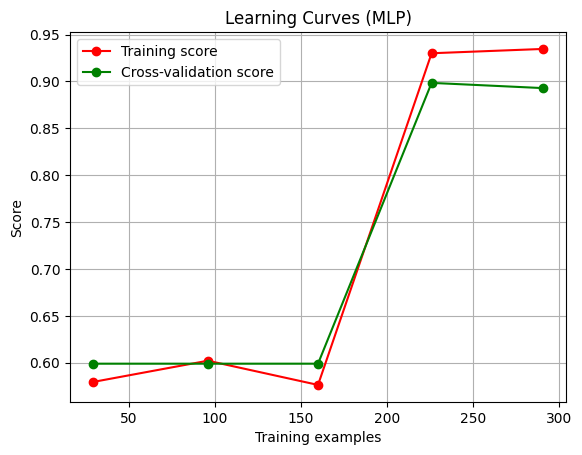

In [28]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=None):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = train_scores.mean(axis=1)
    test_scores_mean = test_scores.mean(axis=1)
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Define train sizes
train_sizes = [0.1, 0.33, 0.55, 0.78, 1.0]

# Plot learning curve for RBF SVM
plot_learning_curve(rbf_model, "Learning Curves (RBF SVM)", X_train, y_train, cv=5, n_jobs=-1, train_sizes=train_sizes)
plt.show()

# Plot learning curve for Perceptron
plot_learning_curve(perceptron_model, "Learning Curves (Perceptron)", X_train, y_train, cv=5, n_jobs=-1, train_sizes=train_sizes)
plt.show()

# Plot learning curve for MLP
plot_learning_curve(mlp_model, "Learning Curves (MLP)", X_train, y_train, cv=5, n_jobs=-1, train_sizes=train_sizes)
plt.show()


**11: Compare your previous lab results with nonlinear model results.**

In [29]:
# Import necessary metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 11: Compare your previous lab results with nonlinear model results.
comparison = {
    "Model": ["RBF SVM", "Perceptron", "MLP"],
    "Accuracy": [accuracy_score(y_test, y_test_pred_rbf),
                 accuracy_score(y_test, y_test_pred_perceptron),
                 accuracy_score(y_test, y_test_pred_mlp)],
    "Precision": [precision_score(y_test, y_test_pred_rbf, average='weighted'),
                  precision_score(y_test, y_test_pred_perceptron, average='weighted'),
                  precision_score(y_test, y_test_pred_mlp, average='weighted')],
    "Recall": [recall_score(y_test, y_test_pred_rbf, average='weighted'),
               recall_score(y_test, y_test_pred_perceptron, average='weighted'),
               recall_score(y_test, y_test_pred_mlp, average='weighted')],
    "F1-Score": [f1_score(y_test, y_test_pred_rbf, average='weighted'),
                 f1_score(y_test, y_test_pred_perceptron, average='weighted'),
                 f1_score(y_test, y_test_pred_mlp, average='weighted')]
}

comparison_df = pd.DataFrame(comparison)
print(comparison_df)


        Model  Accuracy  Precision    Recall  F1-Score
0     RBF SVM  0.692308   0.479290  0.692308  0.566434
1  Perceptron  0.634615   0.832967  0.634615  0.637184
2         MLP  0.942308   0.942065  0.942308  0.941772


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
